<a href="https://colab.research.google.com/github/eolson615/SpringboardDSCareerTrack/blob/master/Capstone2_LogisticRegression_imbalanceddata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This notebook addresses the issue of imbalanced data in the Telco customer Churn data. First, I used the stratification process on the train test split to see if it produces a noticeable difference in our model. Then, I implement an oversampling technique, SMOTE, and check the impact it had on our model. Finally, I use an undersampling technique, nearmiss, to see if this will increase the recall for Yes in our Churn target variable. <br> I use the sklearn Logistic Regression model to analyze the effect these different methods are having on the predictive power of our models. 

In [27]:
import warnings  #This was added for aesthetics on GitHub and was not implemented during the composition of this notebook
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.metrics import classification_report, recall_score, accuracy_score, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline as imb_pipeline

In [2]:
df_url = 'https://raw.githubusercontent.com/eolson615/SpringboardDSCareerTrack/master/Capstone2/Data/telcodata_posteda.csv'
df = pd.read_csv(df_url, index_col=[0])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
X = df.drop(columns='Churn')
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [4]:
y = pd.Series(df.Churn.map(dict(Yes=1, No=0)))
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

##I train test split the data. The data is then passed through a pipeline with a column transfer for the categorical features and the numeric features. OneHotEncoder and StandardScaler are used for this first model. The model is then trained and tested. The Classification report indicates that the Yes recall increased slightly, but still not helpful for the company when the model miss identifies almost half of the customers who will churn.

In [5]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=56, stratify=y)

In [6]:
print('Xtrain', type(Xtrain), Xtrain.shape, Xtrain)
print('\n')
print("Xtrest", type(Xtest), Xtest.shape, Xtest)
print('\n')
print('ytrain', type(ytrain), ytrain.shape, ytrain)
print('\n')
print("ytrest", type(ytest), ytest.shape, ytest)

Xtrain <class 'pandas.core.frame.DataFrame'> (5282, 19)       gender  SeniorCitizen  ... MonthlyCharges TotalCharges
3333    Male              0  ...          19.35       212.30
1526  Female              0  ...          95.40       293.15
3336  Female              0  ...          20.30      1079.05
6451    Male              1  ...         116.25      7862.25
2192    Male              1  ...          85.65      4824.45
...      ...            ...  ...            ...          ...
5604    Male              0  ...          70.80      1207.00
4739  Female              0  ...          79.00       929.30
523   Female              0  ...          75.60      1758.60
2471  Female              0  ...          98.40      5149.50
3115  Female              0  ...          84.45      1058.60

[5282 rows x 19 columns]


Xtrest <class 'pandas.core.frame.DataFrame'> (1761, 19)       gender  SeniorCitizen  ... MonthlyCharges TotalCharges
5480  Female              0  ...          45.40        45.40
4274  

In [7]:
print("ytrain")
print(ytrain.value_counts(normalize=True))
print('ytest')
print(ytest.value_counts(normalize=True))

ytrain
0    0.73457
1    0.26543
Name: Churn, dtype: float64
ytest
0    0.73481
1    0.26519
Name: Churn, dtype: float64


In [8]:
cat_features = X.select_dtypes(include=['object']).columns
num_features = X.select_dtypes(include=['float64', 'int64']).columns

In [9]:
column_trans = make_column_transformer((OneHotEncoder(), cat_features), (StandardScaler(), num_features), remainder='passthrough')
logreg = LogisticRegression(max_iter=5000)
logreg_pipeline = make_pipeline(column_trans, logreg)
logreg_cvs = cross_val_score(logreg_pipeline, Xtrain, ytrain, scoring='accuracy').mean()
logreg_cvs

0.8025355852756515

In [10]:
logreg_pipeline.fit(Xtrain, ytrain)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'Multiple...
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'))],
    

In [11]:
ypred_train_unadjusted = logreg_pipeline.predict(Xtrain)
class_report_train_unadjusted = classification_report(ytrain, ypred_train_unadjusted)
ypred_test_unadjusted = logreg_pipeline.predict(Xtest)
class_report_test_unadjusted = classification_report(ytest, ypred_test_unadjusted)
print('Unadjusted LogReg model on ytrain')
print(class_report_train_unadjusted)
print('Unadjusted LogReg model on ytest')
print(class_report_test_unadjusted)

Unadjusted LogReg model on ytrain
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3880
           1       0.67      0.56      0.61      1402

    accuracy                           0.81      5282
   macro avg       0.76      0.73      0.74      5282
weighted avg       0.80      0.81      0.80      5282

Unadjusted LogReg model on ytest
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1294
           1       0.63      0.57      0.60       467

    accuracy                           0.80      1761
   macro avg       0.74      0.72      0.73      1761
weighted avg       0.79      0.80      0.79      1761



##Next, I use the SMOTE oversampling method and apply it to a LogisticRegression model.

##The overall accuracy went down, but our Yes recall increased a significant amount. This increase in the Yes recall will help with the business problem.

In [13]:
logreg_smote = LogisticRegression(max_iter=5000)
smote = SMOTE(random_state = 56)
smote_pipeline = imb_pipeline(column_trans, smote, logreg_smote)
smote_cvs = cross_val_score(smote_pipeline, Xtrain, ytrain, scoring='accuracy').mean()
smote_cvs

0.7591851581089991

In [14]:
smote_pipeline.fit(Xtrain, ytrain)

ypred_train_smote = smote_pipeline.predict(Xtrain)
class_report_train_smote = classification_report(ytrain, ypred_train_smote)
print('classification report train smote')
print(class_report_train_smote)

ypred_test_smote = smote_pipeline.predict(Xtest)
class_report_test_smote = classification_report(ytest, ypred_test_smote)
print('classification report test smote')
print(class_report_test_smote)

classification report train smote
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      3880
           1       0.53      0.81      0.64      1402

    accuracy                           0.76      5282
   macro avg       0.72      0.77      0.73      5282
weighted avg       0.81      0.76      0.77      5282

classification report test smote
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1294
           1       0.51      0.79      0.62       467

    accuracy                           0.75      1761
   macro avg       0.71      0.76      0.72      1761
weighted avg       0.80      0.75      0.76      1761



In [15]:
cnf_matrix_logreg_unadjusted = metrics.confusion_matrix(ytest, ypred_test_unadjusted)
cnf_matrix_logreg_smote = metrics.confusion_matrix(ytest, ypred_test_smote)
print(cnf_matrix_logreg_unadjusted), print(cnf_matrix_logreg_smote)

[[1137  157]
 [ 201  266]]
[[946 348]
 [ 98 369]]


(None, None)

##Now, I use the nearmiss undersampling technique in conjunction with a LogisticRegression model.

##The Yes recall remained the same as the SMOTE oversampling method, but the overall accuracy decreased.

In [16]:
logreg_nearmiss = LogisticRegression(max_iter=5000, random_state=56)
nearmiss = NearMiss(random_state = 56)
nearmiss_pipeline = imb_pipeline(column_trans, nearmiss, logreg_nearmiss)
nearmiss_cvs = cross_val_score(nearmiss_pipeline, Xtrain, ytrain, scoring='accuracy').mean()
nearmiss_cvs

0.6667983644390929

In [17]:
nearmiss_pipeline.fit(Xtrain, ytrain)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'Multiple...
                          random_state=56, ratio=None, return_indices=False,
                          sampling_strategy='auto', version=1)),


In [18]:
ypred_train_nearmiss = nearmiss_pipeline.predict(Xtrain)
class_report_train_nearmiss = classification_report(ytrain, ypred_train_nearmiss)
print('classification report train nearmiss')
print(class_report_train_nearmiss)

ypred_test_nearmiss = nearmiss_pipeline.predict(Xtest)
class_report_test_nearmiss = classification_report(ytest, ypred_test_nearmiss)
print('classification report test nearmiss')
print(class_report_test_nearmiss)

classification report train nearmiss
              precision    recall  f1-score   support

           0       0.89      0.63      0.74      3880
           1       0.44      0.78      0.56      1402

    accuracy                           0.67      5282
   macro avg       0.66      0.71      0.65      5282
weighted avg       0.77      0.67      0.69      5282

classification report test nearmiss
              precision    recall  f1-score   support

           0       0.89      0.61      0.72      1294
           1       0.42      0.79      0.55       467

    accuracy                           0.66      1761
   macro avg       0.66      0.70      0.64      1761
weighted avg       0.77      0.66      0.68      1761



##Below are comparisons of the different adjustments on the model.

In [19]:
print('Unadjusted LogReg model') 
print(class_report_test_unadjusted) 
print('Smote LogReg model') 
print(class_report_test_smote) 
print('Nearmiss LogReg model')
print(class_report_test_nearmiss)

Unadjusted LogReg model
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1294
           1       0.63      0.57      0.60       467

    accuracy                           0.80      1761
   macro avg       0.74      0.72      0.73      1761
weighted avg       0.79      0.80      0.79      1761

Smote LogReg model
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1294
           1       0.51      0.79      0.62       467

    accuracy                           0.75      1761
   macro avg       0.71      0.76      0.72      1761
weighted avg       0.80      0.75      0.76      1761

Nearmiss LogReg model
              precision    recall  f1-score   support

           0       0.89      0.61      0.72      1294
           1       0.42      0.79      0.55       467

    accuracy                           0.66      1761
   macro avg       0.66      0.70      0.64      1761
weighted 

In [20]:
cnf_matrix_logreg_nearmiss = metrics.confusion_matrix(ytest, ypred_test_nearmiss)
print('Confusion matrix unadjusted')
print(cnf_matrix_logreg_unadjusted)

print('Confusion matrix SMOTE')
print(cnf_matrix_logreg_smote)

print('Confusion matrix nearmiss')
print(cnf_matrix_logreg_nearmiss)

Confusion matrix unadjusted
[[1137  157]
 [ 201  266]]
Confusion matrix SMOTE
[[946 348]
 [ 98 369]]
Confusion matrix nearmiss
[[789 505]
 [ 96 371]]


In [21]:
list_model_tests = ['logreg_notadjusted', 'logreg_smote', 'logreg_nearmiss']
list_ypred_tests = [ypred_test_unadjusted, ypred_test_smote, ypred_test_nearmiss]
dict_for_pred_scores = {}
list_recall_scores = []
list_accuracy_scores = []

for ypred in list_ypred_tests:
  recallscore = recall_score(ytest, ypred) * 100
  list_recall_scores.append(recallscore)
  accuracyscore = accuracy_score(ytest, ypred) * 100
  list_accuracy_scores.append(accuracyscore)

dict_for_pred_scores['model'] = list_model_tests
dict_for_pred_scores['recall_score'] = list_recall_scores
dict_for_pred_scores['accuracy_score'] = list_accuracy_scores
df_model_scores = pd.DataFrame.from_dict(dict_for_pred_scores)
df_model_scores.to_csv('logreg_imbalanceddate_scores.csv')
df_model_scores

,model,recall_score,accuracy_score
0,logreg_notadjusted,56.959315,79.670642
1,logreg_smote,79.014989,74.673481
2,logreg_nearmiss,79.443255,65.871664


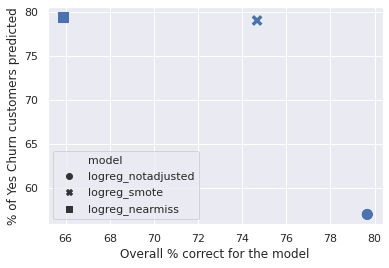

In [22]:
ax = sns.scatterplot(x="accuracy_score", y="recall_score",
                    style="model", data=df_model_scores, s=150)
_ = plt.ylabel('% of Yes Churn customers predicted')
_ = plt.xlabel('Overall % correct for the model')
plt.show()

###It looks like even though the Nearmiss undersampling method gave us a similar result on the Yes recall as the Smote oversampling method, overall it performed worse. Thus it appears that the Smote oversampling method of dealing with the imbalanced data was more successful than both the unadjusted model with stratification alone or the Nearmiss undersampling method.

This is for the 3 different methods dealing with imbalanced data


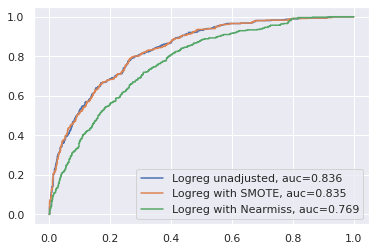

In [23]:
ypred_prob_logreg_unadjusted = logreg_pipeline.predict_proba(Xtest)[::,1]
fpr_unadjusted, tpr_unadjusted, _ = roc_curve(ytest, ypred_prob_logreg_unadjusted)
auc_unadjusted = roc_auc_score(ytest, ypred_prob_logreg_unadjusted)

ypred_prob_logreg_smote = smote_pipeline.predict_proba(Xtest)[::,1]
fpr_smote, tpr_smote, _ = roc_curve(ytest, ypred_prob_logreg_smote)
auc_smote = roc_auc_score(ytest, ypred_prob_logreg_smote)

ypred_prob_logreg_nearmiss = nearmiss_pipeline.predict_proba(Xtest)[::,1]
fpr_nearmiss, tpr_nearmiss, _ = roc_curve(ytest, ypred_prob_logreg_nearmiss)
auc_nearmiss = roc_auc_score(ytest, ypred_prob_logreg_nearmiss)

_ = plt.plot(fpr_unadjusted, tpr_unadjusted, label='Logreg unadjusted, auc='+ str(round(auc_unadjusted, 3)))
_ = plt.plot(fpr_smote, tpr_smote, label='Logreg with SMOTE, auc='+ str(round(auc_smote, 3)))
_ = plt.plot(fpr_nearmiss, tpr_nearmiss, label='Logreg with Nearmiss, auc='+ str(round(auc_nearmiss, 3)))
plt.legend(loc='best')
print("This is for the 3 different methods dealing with imbalanced data")
plt.show()

##Using the SMOTE model, I am producing a data frame with predicitions in it so that I can better understand the model. This will be done in the notebook Capstone2_BusinessAnalysis.

In [24]:
df_with_test_pred = Xtest
df_with_test_pred['Actual_churn'] = ytest
df_with_test_pred['Predicted_churn'] = ypred_test_smote
df_with_test_pred

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Actual_churn,Predicted_churn
5480,Female,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.40,45.40,0,1
4274,Male,0,No,No,45,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),18.85,867.30,0,0
5587,Female,1,No,No,46,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,One year,Yes,Bank transfer (automatic),91.30,4126.35,0,0
36,Male,0,No,No,5,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.70,316.90,1,1
2316,Male,0,No,No,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.70,73.05,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,Male,0,No,No,31,Yes,Yes,DSL,No,Yes,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,71.05,2168.15,0,0
4955,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Mailed check,69.40,69.40,1,1
4816,Female,0,Yes,Yes,55,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,One year,Yes,Credit card (automatic),75.00,4213.90,0,0
5341,Female,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,74.45,1,1


In [25]:
df_with_test_pred.to_csv('telcodata_testpred_frombestmodel.csv')

from google.colab import files
files.download('telcodata_testpred_frombestmodel.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
files.download('logreg_imbalanceddate_scores.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>